## Import Libraries

In [ ]:
!pip install ydata-profiling
!pip install sweetviz


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=12dd4293c0a6f37f49bcdafdd1ced72d0c9714e3e6e163556461b9dc369fd1a7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 40.5 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport
import sweetviz as sv
import plotly.express as px
#from google.colab import files

In [ ]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Load the Data

In [ ]:
FootBallPlayers = pd.read_csv("final_data.csv")

In [ ]:
FootBallPlayers.shape

(10754, 22)

In [ ]:
FootBallPlayers.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [ ]:
FootBallPlayers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [ ]:
FootBallPlayers.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [ ]:
FootBallPlayers.describe(exclude='number')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


In [ ]:
profile_FootBallPlayers = ProfileReport(FootBallPlayers, title="Profiling Report")
profile_FootBallPlayers.to_file("FootBallPlayers_report.html")
from google.colab import files
files.download('FootBallPlayers_report.html')
profile_FootBallPlayers

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
vis_report_FootBallPlayers = sv.analyze(FootBallPlayers)
vis_report_FootBallPlayers.show_html("vis_report_FootBallPlayers.html") # Default arguments will generate to "SWEETVIZ_REPORT.html"
from google.colab import files
files.download('vis_report_FootBallPlayers.html')
vis_report_FootBallPlayers.show_notebook()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# uniqeness
FootBallPlayers[FootBallPlayers.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [ ]:
# uniqeness
FootBallPlayers.drop_duplicates(inplace=True)
FootBallPlayers[FootBallPlayers.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [ ]:
# Completeness
FootBallPlayers.isnull().sum()

,0
player,0
team,0
name,0
position,0
height,0
age,0
appearance,0
goals,0
assists,0
yellow cards,0


In [ ]:
#Completeness
FootBallPlayers['name'].value_counts()

,count
name,
Paulinho,6
Vitinho,5
Guilherme,5
Fernando,4
João Pedro,4
...,...
Everson,1
Matheus Mendes,1
Gabriel Delfim,1


In [ ]:
FootBallPlayers[FootBallPlayers['name'] =='Paulinho']

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3259,/paulinho/profil/spieler/1083888,Clube de Regatas Vasco da Gama,Paulinho,Defender Right-Back,172.0,18.0,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,500000,500000,2,1
3628,/paulinho/profil/spieler/428791,Clube Atlético Mineiro,Paulinho,Attack-LeftWinger,177.0,22.0,47,0.287540,0.107827,0.071885,...,0.0,0.0,2504,458,55,2,7500000,25000000,4,1
3786,/paulinho/profil/spieler/57229,Sport Club Corinthians Paulista,Paulinho,midfield-CentralMidfield,183.0,34.0,8,0.450000,0.000000,0.225000,...,0.0,0.0,400,276,57,15,1200000,40000000,3,0
4016,/paulinho/profil/spieler/85771,CS Marítimo,Paulinho,Defender Right-Back,176.0,31.0,49,0.047468,0.071203,0.213608,...,0.0,0.0,3792,21,2,1,300000,1500000,2,1
4276,/paulinho/profil/spieler/211072,Sporting CP,Paulinho,Attack Centre-Forward,187.0,30.0,84,0.431334,0.297471,0.267724,...,0.0,0.0,6051,199,36,7,8000000,15000000,4,0
9139,/paulinho/profil/spieler/534473,Al-Fayha FC,Paulinho,midfield-CentralMidfield,175.0,26.0,60,0.147996,0.092497,0.277492,...,0.0,0.0,4865,0,0,0,1000000,1600000,3,0


In [ ]:
# Accurecy - types
FootBallPlayers.dtypes

,0
player,object
team,object
name,object
position,object
height,float64
age,float64
appearance,int64
goals,float64
assists,float64
yellow cards,float64


In [ ]:
# Accurecy - Outlier

categorical_features = ['player', 'team', 'name', 'position']

numeric_features = ['height', 'age', 'appearance', 'goals','assists','goals conceded','minutes played','days_injured','games_injured','award','current_value','highest_value','position_encoded']
numeric_features2 = ['height', 'age', 'appearance', 'goals','assists','goals conceded','minutes played','days_injured','games_injured','award','highest_value']

In [ ]:
df=FootBallPlayers.copy()

In [ ]:
df.shape

(10754, 22)

In [ ]:
x_df=df[numeric_features]
x_df.drop('current_value', axis=1, inplace=True)
y_df=df['current_value']

In [ ]:
x_arr = np.array(x_df)
y_arr = np.array(y_df)
#Real_Values


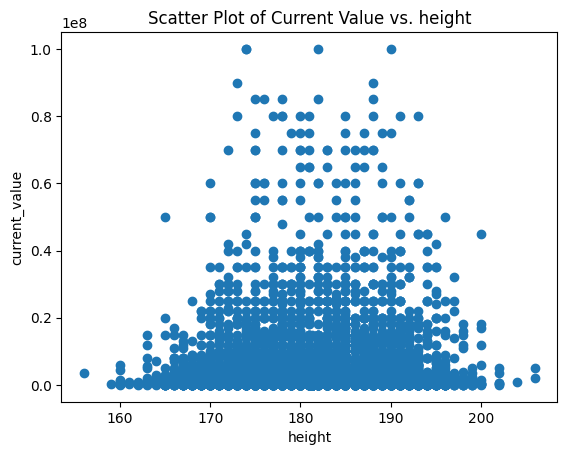

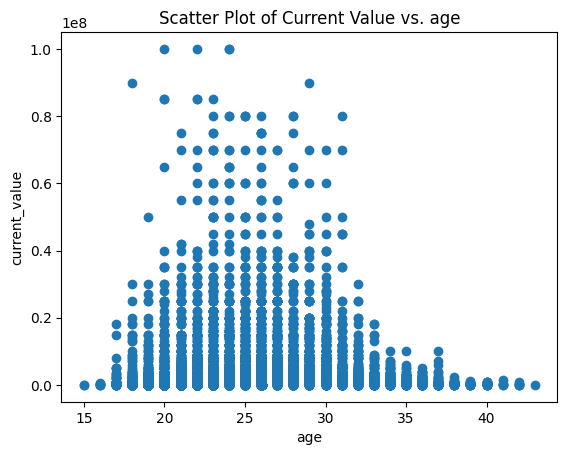

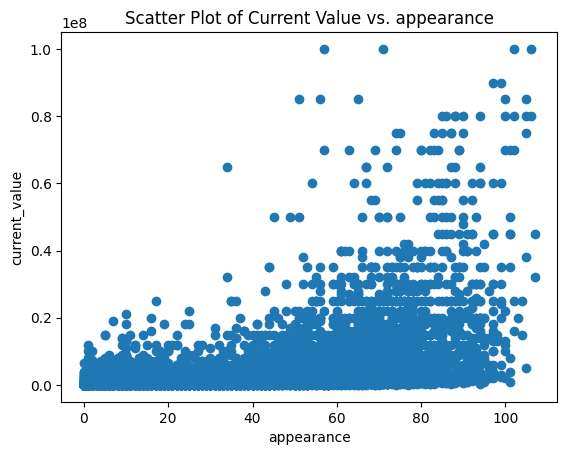

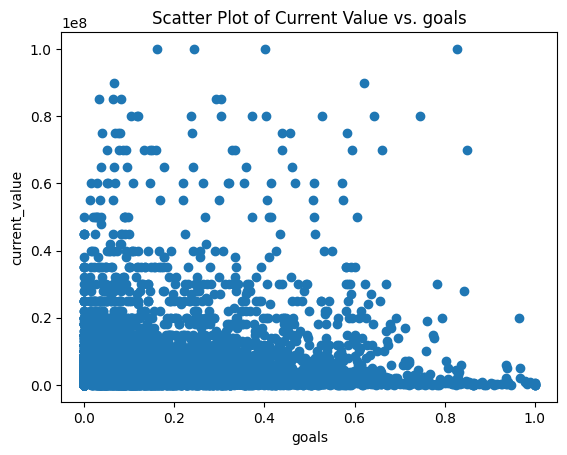

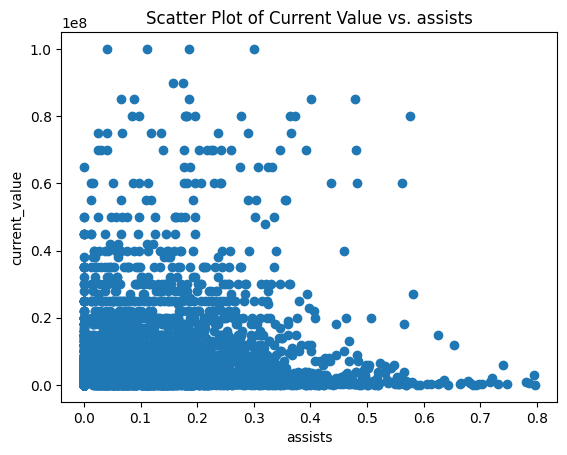

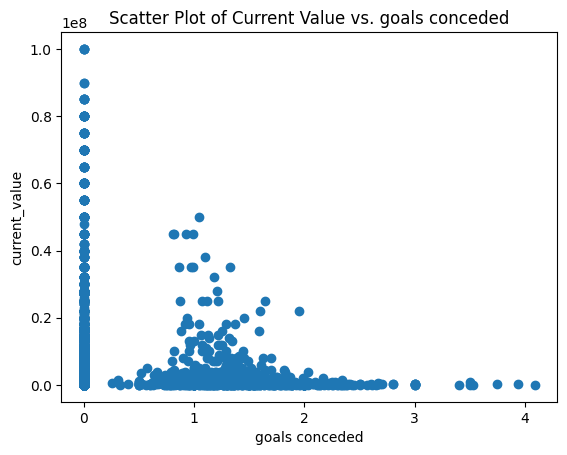

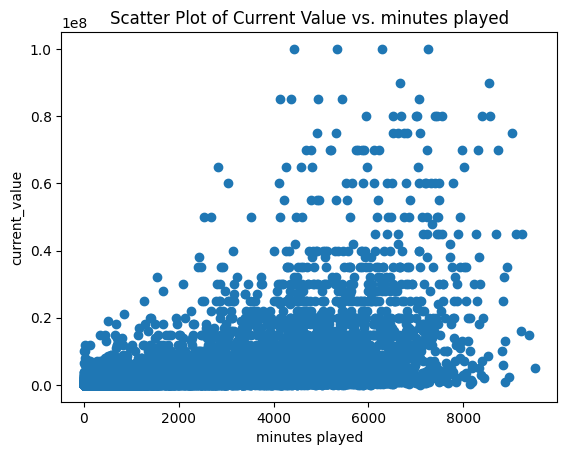

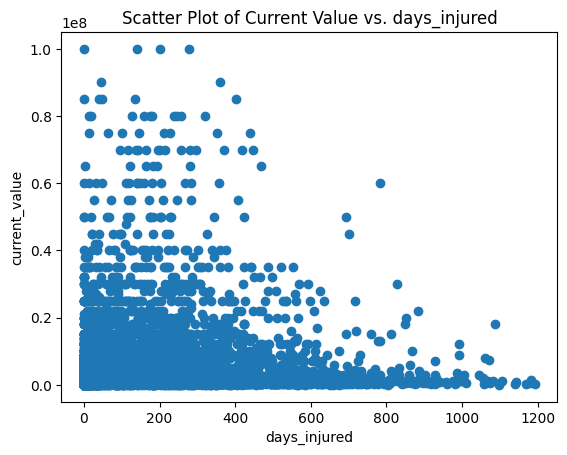

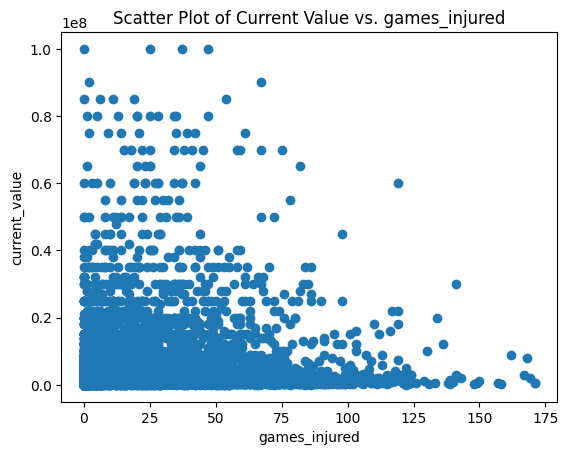

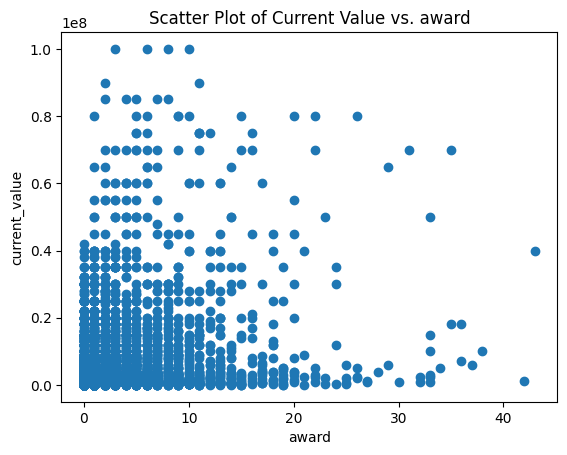

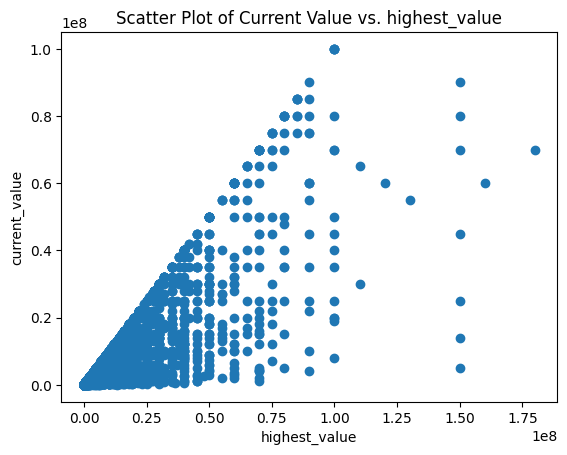

In [ ]:

feature_index = 0
for feature_index in range(len(numeric_features2)):
  x_arr_for_scatter = x_arr[:, feature_index]  # Select the desired feature
  # Now create the scatter plot
  plt.scatter(x_arr[:,feature_index], y_arr)
  plt.xlabel(numeric_features2[feature_index])  # Label the x-axis with the feature name
  plt.ylabel('current_value')
  plt.title('Scatter Plot of Current Value vs. ' + numeric_features2[feature_index])
  plt.show()

In [ ]:
df=df[df['current_value']<=100000000]
df=df[df['current_value']>0]

In [ ]:
df=df[df['goals']<=1]


In [ ]:
df=df[df['assists']<=0.8]

In [ ]:
df=df[df['days_injured']<=1200]

In [ ]:
df=df[df['award']<=50]

In [ ]:
df=df[df['goals conceded']<=5]

In [ ]:
x_df.shape, y_df.shape

((10476, 12), (10476,))

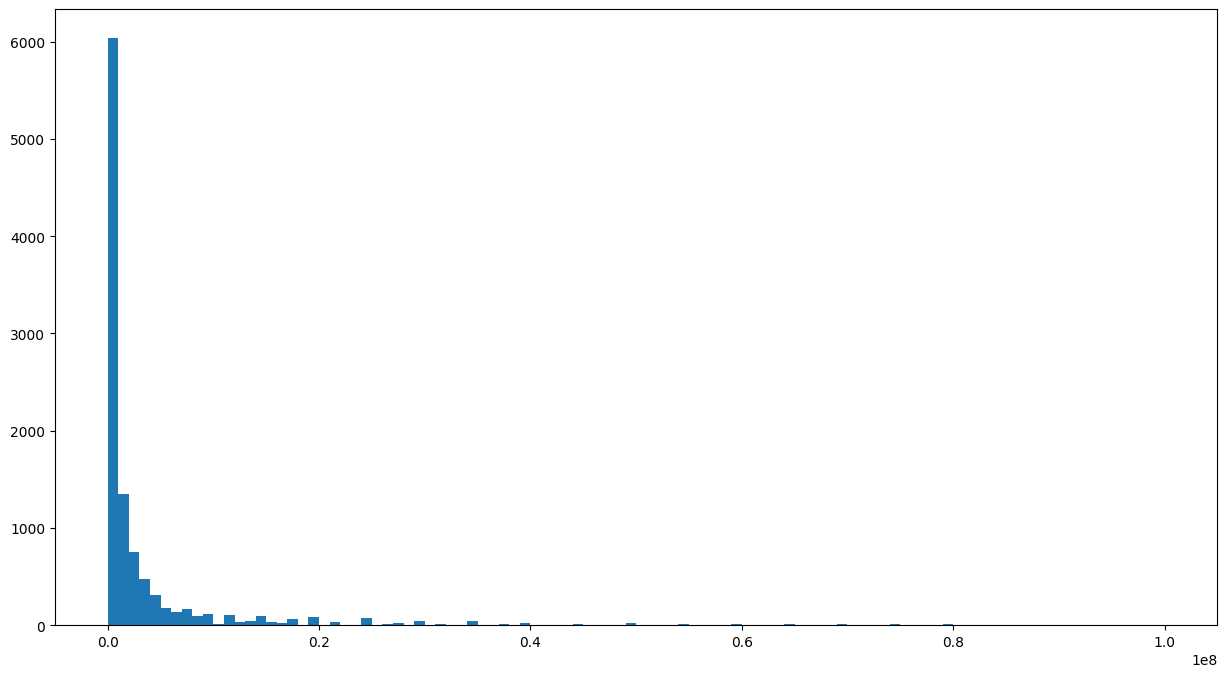

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df['current_value'], bins=100);


In [ ]:
df.shape

(3613, 22)

#### 3. Feature selection

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create a label encoder object
#label_encoder = LabelEncoder()

# Fit and transform the 'name' column
#df['name_encoded'] = label_encoder.fit_transform(df['name'])

# Display the first few rows
#df[['name', 'name_encoded']].head()
#scaler = StandardScaler()

,name,name_encoded
2,Tom Heaton_Manchester United,3300
8,Teden Mengi_Manchester United,3227
11,Brandon Williams_Manchester United,413
54,Danny Ward_Leicester City,616
56,Alex Smithies_Leicester City,169


In [ ]:
df=df[numeric_features]

In [ ]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value       1.000000
highest_value       0.828919
appearance          0.431228
minutes played      0.429796
award               0.293631
assists             0.190999
goals               0.163745
games_injured       0.150324
days_injured        0.121088
position_encoded    0.081798
height              0.042345
age                -0.055378
goals conceded     -0.067395
Name: current_value, dtype: float64


In [ ]:
# Set the correlation threshold
threshold = 0.04  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features.to_list()

['height',
 'age',
 'appearance',
 'goals',
 'assists',
 'goals conceded',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'current_value',
 'highest_value',
 'position_encoded']

In [ ]:
selected_features.size, type(selected_features)

(13, pandas.core.indexes.base.Index)

In [ ]:
df = df[selected_features]
df.head()

,height,age,appearance,goals,assists,goals conceded,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded
0,189.0,32.0,104,0.000000,0.000000,1.217252,9390,42,5,13,15000000,70000000,1
1,196.0,30.0,15,0.000000,0.000000,1.242331,1304,510,58,1,1500000,22000000,1
2,188.0,37.0,4,0.000000,0.000000,0.616438,292,697,84,4,600000,6000000,1
3,175.0,25.0,82,0.028090,0.056180,0.000000,6408,175,22,9,50000000,50000000,2
4,191.0,30.0,63,0.017889,0.017889,0.000000,5031,238,51,21,40000000,80000000,2


In [ ]:
df.shape

(10476, 13)

In [ ]:
# one hot coding
#df = pd.get_dummies(df, columns=categorical_features)

#### 4. Prepare train and test data

In [ ]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X.shape

(10476, 12)

## Buliding the Model

In [ ]:
model = LinearRegression()

In [ ]:
ridge_model = Ridge()  # You can adjust alpha to see different results

In [ ]:
lasso_model = Lasso()  # You can adjust alpha to see different results

In [ ]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5, 0.00001, 0.000001, 0.0000001]  # Regularization strength
}
grid_search = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1)

## Train the Model

In [ ]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [ ]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [ ]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
height,3.979317e+04
age,-1.117348e+06
appearance,-1.585558e+06
goals,1.618387e+05
assists,2.614222e+05
goals conceded,-1.460873e+05
minutes played,2.533678e+06
days_injured,4.899467e+05
games_injured,-8.003444e+05
award,-9.365694e+05


In [ ]:
print(model.intercept_)

3627147.3747016704


In [ ]:
# Fit the Lasso model to the data
lasso_model.fit(X_train_scaled, y_train)  # Assuming X_train_scaled and y_train are your training data

# Now you can access the coef_ attribute
coeff_df = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
height,3.979235e+04
age,-1.117347e+06
appearance,-1.585533e+06
goals,1.618359e+05
assists,2.614198e+05
goals conceded,-1.460842e+05
minutes played,2.533654e+06
days_injured,4.899263e+05
games_injured,-8.003240e+05
award,-9.365685e+05


## Evaluating the Model

1. Mean Square Error

In [ ]:
y_base = [y_train.mean()] * len(y_test)

In [ ]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 63020926993284.08


In [ ]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 18711782712265.17
Mean Squared Error for testing: 18096471094318.113


2. Mean Absolute Error

In [ ]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base}')

Mean Absolute  Error of base model: 4255600.129351965


In [ ]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 2185971.3775768806
Mean Absolute Error for testing: 2138582.280081662


3. Root Mean Squared Error

In [ ]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 7938572.100402192


In [ ]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 4325711.8156744065
Root Mean Squared Error for testing: 4253994.721942907


4. R Square

In [ ]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7483378202032136
R Square for testing: 0.712793776200102


#### Predictions vs. Real Values

In [ ]:
predictions = model.predict(X_test_scaled)
#predictions

In [ ]:
Real_Values = np.array(y_test)
#Real_Values

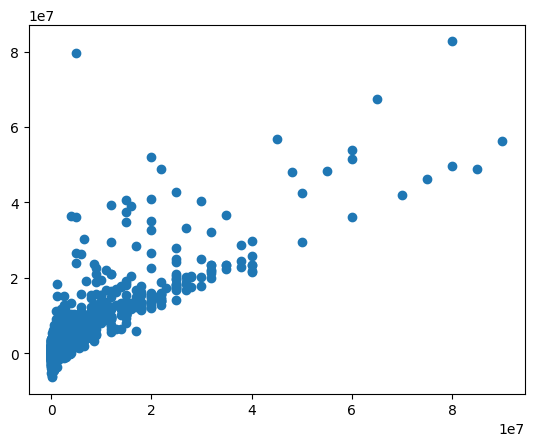

In [ ]:
plt.scatter(Real_Values,predictions);

#### Residual Histogram

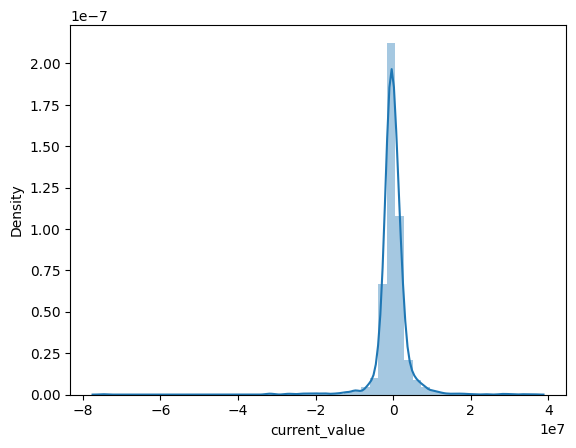

In [ ]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution